<a href="https://colab.research.google.com/github/vikash18086/Capstone/blob/master/Capstone_6th_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/My Drive/IIITD/Capstone/2015_16_Districtwise.csv' .

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from numpy import linalg as LA
import numpy.linalg as linalg
import copy
from collections import defaultdict 
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px
from collections import defaultdict 
import pickle

In [0]:
statewise = pd.read_csv('2015_16_Districtwise.csv')

distname = list(statewise['DISTNAME'])
statename = list(statewise['STATNAME'])
statewise = statewise.drop('AC_YEAR', axis=1)
statewise = statewise.drop('STATCD', axis=1)
statewise = statewise.drop('DISTCD', axis=1)
statewise = statewise.drop('DISTNAME', axis=1)
statewise = statewise.drop('DISTRICTS', axis=1)
statewise = statewise.drop('STATNAME', axis=1)
statewise = statewise.drop('BLOCKS', axis=1)
statewise = statewise.drop('VILLAGES', axis=1)
statewise = statewise.drop('CLUSTERS', axis=1)


In [0]:
label = []
for i,j in zip(statename, distname):
    name = i+' - '+j
    label.append(name)

In [0]:
all_features = list(statewise.columns)
statewise  = statewise.fillna(0)

In [0]:
# Normalization of dataset
x = statewise.values.T
min_max_scaler = preprocessing.Normalizer()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled= x_scaled.tolist()
# df = pd.DataFrame(x_scaled)

In [0]:
len(x_scaled[0])

680

### Data visualization and clustering

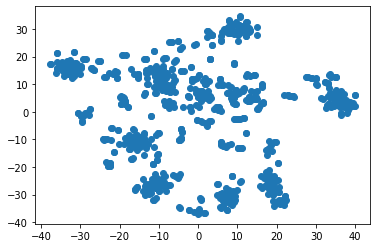

In [0]:
#TSNE PLOTS
dataset=copy.deepcopy(x_scaled)

X_embedded = TSNE(n_components=2).fit_transform(dataset)

x= [i[0] for i in X_embedded]
y= [i[1] for i in X_embedded]

plt.scatter(x,y)
plt.show()

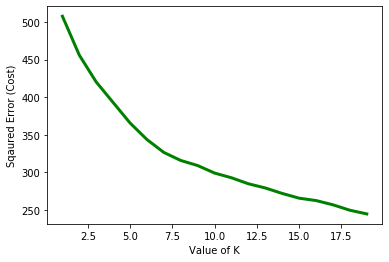

In [0]:
#Here we find out best k value to perform kmeans clustering.
cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(dataset) 
    cost.append(KM.inertia_)  

plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

In [0]:
#APPLY KMEANS AND PLOT CLUSTERS
kmeans = KMeans(n_clusters=15, random_state=0).fit(dataset)  
# kmeans.labels_

knn_labels = list(kmeans.labels_)

cluster_name = defaultdict(list) 
for i,j in zip(knn_labels,label):
    try:
        cluster_name[i].append(j)
    except:
        cluster_name[i] = j

df = pd.DataFrame(list(zip(x, y,knn_labels,label)), columns =['X', 'Y','Label','distname']) 
fig = px.scatter(df, x='X', y='Y', color='Label')
fig.show()

### Feature selection based on variance

In [0]:
dataset = np.array(dataset).T

In [0]:
# Calculating the variance for the features
feature_var=[]
for i in np.array(dataset):
    feature_var.append(np.std(i)**2)

In [0]:
threshold = 0.004
features=[]
for i in range(len(feature_var)):
    if feature_var[i] > threshold:
        features.append(i)

In [0]:
selected_features = []
for i in range(len(all_features)):
    if i in features:
        selected_features.append(all_features[i])

In [0]:
final_dataset = []
for i in selected_features:
    final_dataset.append(list(statewise[i]))

In [0]:
data2 = list(zip(*final_dataset))

In [0]:
df = pd.DataFrame(data2, columns =selected_features) 
df.head()

,SCH7P,ENR3G,ENRTOTG,ENR2P,TCH2G,SWAT5,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,LOC6,MEC6,CPC6,TOTCLOT1G,TCHRM3,TCHRM4
0,0,23,86180,21139,4093,1,534,18986,134,1047,18000,211,47,20,1,117,26,8
1,0,354,89329,46616,3852,5,576,22210,3985,1998,30671,1575,50,36,12,195,130,5
2,0,25,17674,29392,1442,0,50,4388,9940,875,35467,2161,10,9,1,97,280,0
3,0,544,57684,16809,2691,1,497,12092,1677,1285,21352,601,30,18,0,40,98,6
4,0,0,28026,12790,1603,2,400,6307,922,888,20018,588,19,23,1,41,63,29


In [0]:
export_csv = df.to_csv (r'selected_features_5_Dec.csv', index = None, header=True) 

### converting numerical to categorical

In [0]:
statewise = pd.read_csv('selected_features_5_Dec.csv')
statewise.head()

,SCH7P,ENR3G,ENRTOTG,ENR2P,TCH2G,SWAT5,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,LOC6,MEC6,CPC6,TOTCLOT1G,TCHRM3,TCHRM4
0,0,23,86180,21139,4093,1,534,18986,134,1047,18000,211,47,20,1,117,26,8
1,0,354,89329,46616,3852,5,576,22210,3985,1998,30671,1575,50,36,12,195,130,5
2,0,25,17674,29392,1442,0,50,4388,9940,875,35467,2161,10,9,1,97,280,0
3,0,544,57684,16809,2691,1,497,12092,1677,1285,21352,601,30,18,0,40,98,6
4,0,0,28026,12790,1603,2,400,6307,922,888,20018,588,19,23,1,41,63,29


In [0]:
all_features = list(statewise.columns)

In [0]:
data = []
# data.append(statename)
for i in all_features:
    value = list(statewise[i])
    minval = statewise[i].min()
    maxval = statewise[i].max()
    
    split = (maxval - minval)/5
    range1 = split + minval; range2 = range1 + split; range3 = range2 + split; range4 = range3 + split;
    
#     print("minval : ",minval,", maxval : ",maxval)
    col = []
    for i1 in value:    
        if ((i1 >= minval) and (i1 < range1)):
            col.append("low")
        elif ((i1 >=range1) and (i1 < range2)):
            col.append("low-medium")
        elif ((i1 >=range2) and (i1 < range3)):
            col.append("medium")
        elif ((i1 >=range3) and (i1 < range4)):
            col.append("high-medium")
        else:
            col.append("high")
        # if(i1 < range3):
        #   col.append(0)
        # else:
        #   col.append(1)
  
    data.append(col)

In [0]:
data1 = np.array(data)
all_features = list(statewise.columns)
#convert col wise list to row wise list 
data2 = list(zip(*data))

In [0]:
df = pd.DataFrame(data2, columns =all_features) 
df.head()

,SCH7P,ENR3G,ENRTOTG,ENR2P,TCH2G,SWAT5,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,LOC6,MEC6,CPC6,TOTCLOT1G,TCHRM3,TCHRM4
0,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low
1,low,low,low,low,low-medium,low,low,low,low,low-medium,low,low,low,low,low,low,low,low
2,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
3,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low
4,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low


In [0]:
export_csv = df.to_csv (r'association_input_5_Dec.csv', index = None, header=True) 

### Read association_input file

In [0]:
statewise = pd.read_csv('association_input_5_Dec.csv')
statewise.head()

,SCH7P,ENR3G,ENRTOTG,ENR2P,TCH2G,SWAT5,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,LOC6,MEC6,CPC6,TOTCLOT1G,TCHRM3,TCHRM4
0,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low
1,low,low,low,low,low-medium,low,low,low,low,low-medium,low,low,low,low,low,low,low,low
2,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
3,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low
4,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low


In [0]:
features = statewise.columns
dataset = statewise.values.tolist()
records = dataset

In [0]:
len(records)

680

In [0]:
records = []
for i in range(len(dataset)):
    row = []
    for j in range(len(dataset[0])):
        s = features[j]+'_'+ dataset[i][j]
        row.append(s)
    records.append(row)

In [0]:
 !pip install efficient-apriori

In [0]:
from efficient_apriori import apriori

itemsets, rules = apriori(records, min_support=0.85, min_confidence=1)

In [0]:
rules

[{ENR3G_low} -> {TCHRM3_low},
 {TCHM7_low} -> {SCH7P_low},
 {ENR2P_low, ENR3G_low} -> {TCHRM3_low},
 {ENR2P_low, TCHM7_low} -> {SCH7P_low},
 {ENR3G_low, ENRG3_low} -> {TCHRM3_low},
 {ENR3G_low, PREP_low} -> {TCHRM3_low},
 {ENR3G_low, PRESTD_low} -> {TCHRM3_low},
 {ENR3G_low, SCH7P_low} -> {TCHRM3_low},
 {PREP_low, TCHM7_low} -> {SCH7P_low},
 {TCHM7_low, TCHRM3_low} -> {SCH7P_low},
 {ENR2P_low, ENR3G_low, ENRG3_low} -> {TCHRM3_low},
 {ENR3G_low, ENRG3_low, PREP_low} -> {TCHRM3_low},
 {ENR3G_low, ENRG3_low, SCH7P_low} -> {TCHRM3_low}]

In [0]:
store_rule = []
store_info = [] 
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
print("Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:")
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)
    conf = rule.confidence 
    supp  = rule.support
    lift = rule.lift
    x = str(str(str(str(rule).split('(')[0]).replace('{','')).replace('}','')).replace(' ->',',')
    y = str(x.replace(' ','')).split(',')
    y_ = []
    for i in y:
        y_.append(i.split('_')[0])
        
    store_info.append([y_,conf,supp,lift])
    store_rule.append(rule)

Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:
{ENR2P_low, ENR3G_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.879, lift: 1.035, conv: 33823529.412)
{ENR3G_low, PREP_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.876, lift: 1.035, conv: 33823529.412)
{ENR3G_low, PRESTD_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.856, lift: 1.035, conv: 33823529.412)
{ENR3G_low, SCH7P_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.875, lift: 1.035, conv: 33823529.412)
{ENR2P_low, ENR3G_low, ENRG3_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.865, lift: 1.035, conv: 33823529.412)
{ENR3G_low, ENRG3_low, PREP_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.853, lift: 1.035, conv: 33823529.412)
{ENR3G_low, ENRG3_low, SCH7P_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.851, lift: 1.035, conv: 33823529.412)
{ENR3G_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.922, lift: 1.035, conv: 33823529.412)
{ENR3G_low, ENRG3_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.899, lift: 1.035, con

In [0]:
store_info[0]

[['ENR2P', 'ENR3G', 'TCHRM3'], 1.0, 0.8794117647058823, 1.035007610350076]

### Apply Random-Forest Feature selection followed by Apriori

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier

In [0]:
statewise = pd.read_csv('2015_16_Districtwise.csv')

distname = list(statewise['DISTNAME'])
statename = list(statewise['STATNAME'])
statewise = statewise.drop('AC_YEAR', axis=1)
statewise = statewise.drop('STATCD', axis=1)
statewise = statewise.drop('DISTCD', axis=1)
statewise = statewise.drop('DISTNAME', axis=1)
statewise = statewise.drop('DISTRICTS', axis=1)
statewise = statewise.drop('STATNAME', axis=1)
statewise = statewise.drop('BLOCKS', axis=1)
statewise = statewise.drop('VILLAGES', axis=1)
statewise = statewise.drop('CLUSTERS', axis=1)

label = []
for i,j in zip(statename, distname):
    name = i+' - '+j
    label.append(name)

all_features = list(statewise.columns)
statewise  = statewise.fillna(0)

In [0]:
feature_label = statewise.columns

In [0]:
statewise.head()

,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOTP,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10,2379.0,135672.0,72701.0,1107,818,2,14,2,84,49,0,2076,980,697,1,14,2,49,49,0,1792,127,121,1,0,0,35,0,0,284,...,0,0,0,0,0,0,78,26,104,35,2,37,6,0,6,86,4,92,33,453,57,59116,11,9749,46949,27,7534,27433,27,3472,21322,26,2594,3489,5315,27,62,23,852,239
1,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35,4243.0,117874.0,70952.0,1215,825,9,11,5,176,69,0,2310,1108,639,1,11,5,96,69,0,1929,107,186,8,0,0,80,0,0,381,...,0,0,0,0,0,0,118,90,208,63,32,95,5,1,6,122,2,222,98,313,40,53237,0,4406,38161,0,3801,26138,0,1763,17307,0,1571,4127,5800,210,53,30,1665,360
2,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95,1979.0,113560.0,62397.0,258,417,36,2,0,263,9,0,985,203,209,1,2,0,65,9,0,489,55,208,35,0,0,198,0,0,496,...,0,0,0,0,0,0,59,216,275,85,151,236,11,12,23,14,0,81,36,375,54,13624,227,1266,15286,276,1251,6370,34,429,5444,31,408,817,3284,886,11,0,2873,40
3,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56,1361.0,118477.0,58838.0,755,537,10,10,1,98,57,0,1468,697,423,1,10,1,40,57,0,1229,56,114,9,0,0,58,0,0,237,...,0,0,0,0,0,0,100,41,141,44,9,53,0,0,0,41,1,62,20,143,18,37707,0,3098,27383,0,2411,17795,18,1052,12469,18,857,2290,3837,119,45,8,1035,325
4,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41,1086.0,64493.0,30166.0,532,339,4,14,2,94,43,0,1028,497,233,0,14,2,23,43,0,812,35,106,4,0,0,71,0,0,216,...,0,0,0,0,0,0,83,32,115,46,7,53,3,0,3,15,1,17,8,37,9,20123,132,2775,16660,44,2531,9438,62,1004,7408,17,855,1688,2584,151,67,5,1101,209


In [0]:
X = np.array(statewise)
Y = label
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100)).fit(X,Y)

In [0]:
#return boolean value corresponding to index of selected features
sel_feat = list(sel.get_support())
#select features return by Random forest 
selected_features = []
for i,j in zip(sel_feat,all_features):
  if i:
    selected_features.append(j)

In [0]:
if len(selected_features) > 30:
  selected_features = selected_features[:30]

In [0]:
final_dataset = []
for i in selected_features:
    final_dataset.append(list(statewise[i]))

data2 = list(zip(*final_dataset))

df = pd.DataFrame(data2, columns =selected_features)
export_csv = df.to_csv (r'selected_features_5_Dec.csv', index = None, header=True) 
df.head()

,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_11_13_15,SCH2,SCH7,SCH6G,SCH2P,SCHTOTP,SCH5GR,SCH2GA,SCH1PR,SCH2PR,SCHTOTPR,SCHBOY1,SCHGIR3,SCHGIR7,ENR2,ENR3,ENR5,ENR6,ENRTOT,ENR4G
0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10,2379.0,72701.0,818,49,49,121,284,2,697,117,114,254,1105,2,44,70411,322,206,16030,127558,545
1,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35,4243.0,70952.0,825,69,96,186,381,5,639,98,160,320,1206,9,66,91652,8209,244,36272,183107,348
2,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95,1979.0,62397.0,417,9,65,208,496,0,209,4,14,19,256,32,7,38942,20810,0,50880,119458,44
3,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56,1361.0,58838.0,537,57,40,114,237,1,423,55,110,222,754,10,54,48001,3581,71,17407,95521,488
4,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41,1086.0,30166.0,339,43,23,106,216,2,233,27,88,163,524,4,42,26023,2057,79,18741,61345,517


### converting numerical to categorical

In [0]:
statewise = pd.read_csv('selected_features_5_Dec.csv')
statewise.head()

all_features = list(statewise.columns)

data = []
# data.append(statename)
for i in all_features:
    value = list(statewise[i])
    minval = statewise[i].min()
    maxval = statewise[i].max()
    
    split = (maxval - minval)/5
    range1 = split + minval; range2 = range1 + split; range3 = range2 + split; range4 = range3 + split;
    
#     print("minval : ",minval,", maxval : ",maxval)
    col = []
    for i1 in value:    
        if ((i1 >= minval) and (i1 < range1)):
            col.append("low")
        elif ((i1 >=range1) and (i1 < range2)):
            col.append("low-medium")
        elif ((i1 >=range2) and (i1 < range3)):
            col.append("medium")
        elif ((i1 >=range3) and (i1 < range4)):
            col.append("high-medium")
        else:
            col.append("high")
        # if(i1 < range3):
        #   col.append(0)
        # else:
        #   col.append(1)
  
    data.append(col)

data1 = np.array(data)
all_features = list(statewise.columns)
#convert col wise list to row wise list 
data2 = list(zip(*data))

df = pd.DataFrame(data2, columns =all_features) 
df.head()

,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_11_13_15,SCH2,SCH7,SCH6G,SCH2P,SCHTOTP,SCH5GR,SCH2GA,SCH1PR,SCH2PR,SCHTOTPR,SCHBOY1,SCHGIR3,SCHGIR7,ENR2,ENR3,ENR5,ENR6,ENRTOT,ENR4G
0,low-medium,low,medium,high-medium,low,low,high-medium,medium,high-medium,low,low,low-medium,low,low,low,low,low,medium,low,low,low,low,low,low,low,low,low,low,low,low
1,low-medium,low,medium,high-medium,low,low,high-medium,medium,high-medium,low,low,low-medium,low,low-medium,low,low,low,low-medium,low,low-medium,low,low,low,low,low,low,low,low,low,low
2,high,low,medium,high-medium,low,low,high-medium,high-medium,high-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
3,low-medium,low,medium,high-medium,low,low,medium,medium,high-medium,low,low,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low
4,low-medium,low,medium,high-medium,low,low,high-medium,medium,high-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low


In [0]:
#update df
df12 = np.array(df) 
feature_name = df.columns
for i in range(len(df12)):
  for j in range(len(df12[i])):
    df12[i][j] = feature_name[j]+'_'+df12[i][j]
df = pd.DataFrame(df12, columns =feature_name) 

In [0]:
export_csv = df.to_csv (r'association_input_5_Dec.csv', index = None, header=True) 

### Read association_input file

In [0]:
statewise = pd.read_csv('association_input_5_Dec.csv')
statewise.head()

,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_11_13_15,SCH2,SCH7,SCH6G,SCH2P,SCHTOTP,SCH5GR,SCH2GA,SCH1PR,SCH2PR,SCHTOTPR,SCHBOY1,SCHGIR3,SCHGIR7,ENR2,ENR3,ENR5,ENR6,ENRTOT,ENR4G
0,P_URB_POP_low-medium,POPULATION_0_6_low,GROWTHRATE_medium,SEXRATIO_high-medium,P_SC_POP_low,P_ST_POP_low,OVERALL_LI_high-medium,FEMALE_LIT_medium,MALE_LIT_high-medium,AREA_SQKM_low,TOT_11_13_15_low,SCH2_low-medium,SCH7_low,SCH6G_low,SCH2P_low,SCHTOTP_low,SCH5GR_low,SCH2GA_medium,SCH1PR_low,SCH2PR_low,SCHTOTPR_low,SCHBOY1_low,SCHGIR3_low,SCHGIR7_low,ENR2_low,ENR3_low,ENR5_low,ENR6_low,ENRTOT_low,ENR4G_low
1,P_URB_POP_low-medium,POPULATION_0_6_low,GROWTHRATE_medium,SEXRATIO_high-medium,P_SC_POP_low,P_ST_POP_low,OVERALL_LI_high-medium,FEMALE_LIT_medium,MALE_LIT_high-medium,AREA_SQKM_low,TOT_11_13_15_low,SCH2_low-medium,SCH7_low,SCH6G_low-medium,SCH2P_low,SCHTOTP_low,SCH5GR_low,SCH2GA_low-medium,SCH1PR_low,SCH2PR_low-medium,SCHTOTPR_low,SCHBOY1_low,SCHGIR3_low,SCHGIR7_low,ENR2_low,ENR3_low,ENR5_low,ENR6_low,ENRTOT_low,ENR4G_low
2,P_URB_POP_high,POPULATION_0_6_low,GROWTHRATE_medium,SEXRATIO_high-medium,P_SC_POP_low,P_ST_POP_low,OVERALL_LI_high-medium,FEMALE_LIT_high-medium,MALE_LIT_high-medium,AREA_SQKM_low,TOT_11_13_15_low,SCH2_low,SCH7_low,SCH6G_low,SCH2P_low,SCHTOTP_low,SCH5GR_low,SCH2GA_low,SCH1PR_low,SCH2PR_low,SCHTOTPR_low,SCHBOY1_low,SCHGIR3_low,SCHGIR7_low,ENR2_low,ENR3_low,ENR5_low,ENR6_low,ENRTOT_low,ENR4G_low
3,P_URB_POP_low-medium,POPULATION_0_6_low,GROWTHRATE_medium,SEXRATIO_high-medium,P_SC_POP_low,P_ST_POP_low,OVERALL_LI_medium,FEMALE_LIT_medium,MALE_LIT_high-medium,AREA_SQKM_low,TOT_11_13_15_low,SCH2_low,SCH7_low,SCH6G_low,SCH2P_low,SCHTOTP_low,SCH5GR_low,SCH2GA_low-medium,SCH1PR_low,SCH2PR_low,SCHTOTPR_low,SCHBOY1_low,SCHGIR3_low,SCHGIR7_low,ENR2_low,ENR3_low,ENR5_low,ENR6_low,ENRTOT_low,ENR4G_low
4,P_URB_POP_low-medium,POPULATION_0_6_low,GROWTHRATE_medium,SEXRATIO_high-medium,P_SC_POP_low,P_ST_POP_low,OVERALL_LI_high-medium,FEMALE_LIT_medium,MALE_LIT_high-medium,AREA_SQKM_low,TOT_11_13_15_low,SCH2_low,SCH7_low,SCH6G_low,SCH2P_low,SCHTOTP_low,SCH5GR_low,SCH2GA_low,SCH1PR_low,SCH2PR_low,SCHTOTPR_low,SCHBOY1_low,SCHGIR3_low,SCHGIR7_low,ENR2_low,ENR3_low,ENR5_low,ENR6_low,ENRTOT_low,ENR4G_low


In [0]:
features = statewise.columns
dataset = statewise.values.tolist()
records = dataset

# records = []
# for i in range(len(dataset)):
#     row = []
#     for j in range(len(dataset[0])):
#         s = features[j]+'_'+ dataset[i][j]
#         row.append(s)
#     records.append(row)

In [0]:
itemsets, rules = apriori(records, min_support=0.85, min_confidence=1)

In [0]:
len(rules)

23

In [0]:
store_rule = []
store_info = [] 
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
print("Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:")
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)
    conf = rule.confidence 
    supp  = rule.support
    lift = rule.lift
    x = str(str(str(str(rule).split('(')[0]).replace('{','')).replace('}','')).replace(' ->',',')
    y = str(x.replace(' ','')).split(',')
    y_ = []
    for i in y:
        y_.append(i.split('_')[0])
        
    store_info.append([y_,conf,supp,lift])
    store_rule.append(rule)

Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:
{ENR3_low, SCH6G_low} -> {SCHGIR3_low} (conf: 1.000, supp: 0.887, lift: 1.037, conv: 35294117.647)
{ENR3_low, ENR6_low, SCH6G_low} -> {SCHGIR3_low} (conf: 1.000, supp: 0.874, lift: 1.037, conv: 35294117.647)
{SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.918, lift: 1.086, conv: 79411764.706)
{AREA_SQKM_low, SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.853, lift: 1.086, conv: 79411764.706)
{ENR3_low, SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.850, lift: 1.086, conv: 79411764.706)
{ENR6_low, SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.906, lift: 1.086, conv: 79411764.706)
{SCH6G_low, SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.853, lift: 1.086, conv: 79411764.706)
{ENR5_low, ENR6_low, SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.884, lift: 1.086, conv: 79411764.706)
{ENR5_low, SCH5GR_low, SCH7_low} -> {SCHGIR7_low} (conf: 1.000, supp: 0.860, lift: 1.086, con

In [0]:
store_info[0]

[['ENR3', 'SCH6G', 'SCHGIR3'], 1.0, 0.8867647058823529, 1.0365853658536586]

### Pickle dump & load

In [0]:
# pickle dump
itemsets_file = open("itemsets","wb")
pickle.dump(itemsets,itemsets_file)
itemsets_file.close()

rules_file = open("rules","wb")
pickle.dump(rules,rules_file)
rules_file.close()

In [0]:
#pickle load
itemsets_file = open("itemsets",'rb')
itemsets = pickle.load(itemsets_file)
itemsets_file.close()

rules_file = open("rules",'rb')
rules = pickle.load(rules_file)
rules_file.close()